In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from glob import glob
from keras.models import Model
from keras.layers import Flatten,Dense,Dropout,Softmax

In [ ]:
Image_size = [224,224]
valid_path = "/content/drive/MyDrive/Datasets/car_brand_detector/Images/Test"
train_path = "/content/drive/MyDrive/Datasets/car_brand_detector/Images/Train"

In [ ]:
# Creating the models

vgg = tf.keras.applications.vgg19.VGG19(
    include_top=False, weights='imagenet', input_shape=Image_size+[3], 
)

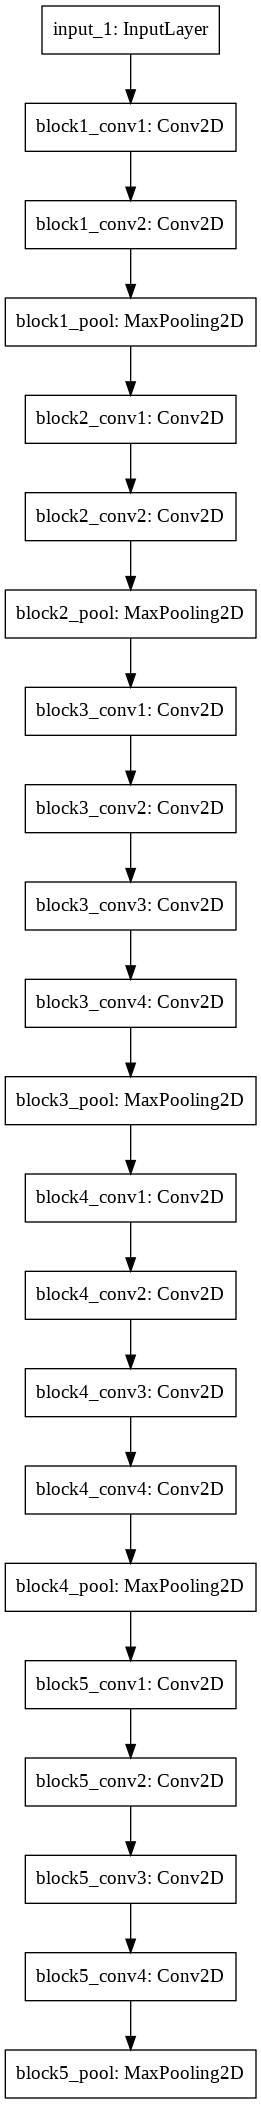

In [ ]:
plot_model(vgg)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# get the number of classes in output
folders = glob("/content/drive/MyDrive/Datasets/car_brand_detector/Images/Train/*")
folders

['/content/drive/MyDrive/Datasets/car_brand_detector/Images/Train/audi',
 '/content/drive/MyDrive/Datasets/car_brand_detector/Images/Train/lamborghini',
 '/content/drive/MyDrive/Datasets/car_brand_detector/Images/Train/mercedes']

In [ ]:
# Adding the two extra layers
x = Flatten()(vgg.output)
prediction = Dense(len(folders),activation='softmax')(x)

In [ ]:
# Building the model
model = Model(inputs = vgg.input , outputs = prediction)

plot_model(model)

model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')

test_set = train_datagen.flow_from_directory(valid_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [ ]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 79s 57s/step - loss: 2.1735 - accuracy: 0.4531 - val_loss: 1.2031 - val_accuracy: 0.3793
Epoch 2/20
2/2 [==============================] - 78s 57s/step - loss: 1.4228 - accuracy: 0.3594 - val_loss: 2.0745 - val_accuracy: 0.3276
Epoch 3/20
2/2 [==============================] - 77s 57s/step - loss: 1.6668 - accuracy: 0.4844 - val_loss: 0.9628 - val_accuracy: 0.6207
Epoch 4/20
2/2 [==============================] - 78s 57s/step - loss: 0.4997 - accuracy: 0.8281 - val_loss: 0.9759 - val_accuracy: 0.5345
Epoch 5/20
2/2 [==============================] - 78s 57s/step - loss: 0.7362 - accuracy: 0.6562 - val_loss: 0.8971 - val_accuracy: 0.7586
Epoch 6/20
2/2 [==============================] - 77s 57s/step - loss: 0.4669 - accuracy: 0.8125 - val_loss: 0.8956 - val_accuracy: 0.6552
Epoch 7/20
2/2 [==============================] - 78s 57s/step - loss: 0.2460 - accuracy: 0.8906 - val_loss: 0.7986 - val_accuracy: 0.6897
Epoch 8/20
2/2 [===========